 <div style="text-align:center;">

   <span style="color:green; font-size:2em; font-weight:bold;">Vérification de la loi d'Okun à travers le monde</span><br><br>
  <span style="font-weight:bold;">Réalisé par:</span><br>
  <span>NOUBOUSSI GNINTEDEM LUCIE MARIMAR</span><br>
  <span>YOUSRA JEDDOUB</span> <br>
  <span>AMINA MANSEUR</span> <br>
  <span style="font-weight:bold;">Sous l'encadrement de:</span><br>
  <span> Mr. Daniel MARIN</span><br>

</div>

<div style="margin-top: 20px; margin-bottom: 20px; border-bottom: 2px solid #006400;"></div>

 <div style="text-align:center;">
  <span style="color:green; font-size:2em; font-weight:bold;">Préparation des données </span><br><br>

# <span style="color:green">Introduction</span><br><br> 

Dans cette première partie, l'objectif est de construire les DataFrames nécessaires à notre projet.<br>
La démarche suivie est la suivante :<br>
<div style="margin-left: 20px;">
    <span style="font-weight:bold;">1.</span> Importer les différentes BD en local.<br>
    <span style="font-weight:bold;">2.</span> Construire les Dataframes par l'utilisation des méthodes du module Pandas.<br>
    <span style="font-weight:bold;">3.</span> Les bases de données étant disponibles en ligne ; Automatisation de l'importation en utilisant un url (ceci garantit que les données soient toujours à jour).<br>
    <span style="font-weight:bold;">4.</span> Optimisation du code de facon à ce qu'il soit le plus reproductible possible et ce en définissant des fonctions selon les besoins du projet.
    </div>

# <span style="color:green">I- Importation et installation des packages</span>

Pour plus de clarté et de lisibilité du code, nous déclarons l'ensemble des imports nécessaires dans un fichier distinct "declaration.py". Ce dernier est ainsi appelé au tout début. Si des ajouts, suppressions ou mises à jour des dépendances sont requises, ces dernières sont faites simplement dans le fichier "declaration.py".

In [1]:
from importlib import reload
import declarations as d
reload(d)

<module 'declarations' from 'c:\\Projet-Python\\monmodule\\declarations.py'>

# <span style="color:green; ">II- Construction de la base de données</span>

## <span style="color:green; text-align:center;">II-1 Importation de la base GemDataEXTR.Zip via son url de téléchargement</span>

In [2]:
# L'importation se fait via l'url de téléchargement
url = "https://datacatalogfiles.worldbank.org/ddh-published/0037798/DR0092042/GemDataEXTR.zip?"
d.load(url, "GemDataEXTR.zip")

Téléchargement de base GemDataEXTR.zip réussi.


In [3]:
# Choix des fichiers à extraire
nom_fichiers = [('Unemployment Rate, seas. adj..xlsx', 'monthly'),
              ('GDP Deflator at Market Prices, LCU.xlsx', 'quarterly')
]

# Extraction des bases dans la mémoire: chomage et PIB déflaté
df_Unemployement, df_GDP = [d.extraire_fichier_zip('./bases/GemDataEXTR.zip', nom_fichier, nom_feuille)
                           for nom_fichier, nom_feuille in nom_fichiers]

<div style="margin-left: 20px;">
-L'extraction des données sur le taux de chômage et le taux de croissance du PIB déflaté par pays est désormais complète. <br>
-Dans la prochaine étape, nous procéderons à une exploration rapide de ces données et les fusionnerons pour une analyse plus approfondie.
</div>

### <span style="color:green; text-align:center;">II-1-1 Préparation des bases de données</span>

#### <span style="color:green; text-align:center;">II-1-1-1 Base taux de chômage</span>

In [4]:
# Visualisation
df_Unemployement.head()

,Advanced Economies,Argentina,Australia,Austria,Belgium,Bulgaria,Bahrain,Belarus,Brazil,Canada,...,Thailand,Tunisia,Turkey,"Taiwan, China",Uruguay,United States,"Venezuela, RB",Viet Nam,World (WBG members),South Africa
Year,,,,,,,,,,,,,,,,,,,,,
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-12-01,8.305220,NaN,10.66106,6.869156,9.450078,16.08,NaN,NaN,NaN,11.4,...,NaN,NaN,NaN,1.3,NaN,6.5,NaN,NaN,NaN,NaN
1994-01-01,8.328236,NaN,10.58005,6.672157,9.518617,15.86,NaN,NaN,NaN,11.4,...,NaN,NaN,NaN,1.4,NaN,6.6,NaN,NaN,NaN,NaN
1994-02-01,8.328561,NaN,10.36909,6.637267,9.631846,15.67,NaN,NaN,NaN,11.1,...,NaN,NaN,NaN,1.7,NaN,6.6,NaN,NaN,NaN,NaN
1994-03-01,8.265035,NaN,10.33146,6.425844,9.716527,15.49,NaN,NaN,NaN,10.6,...,NaN,NaN,NaN,1.6,NaN,6.5,NaN,NaN,NaN,NaN


<div style="margin-left: 20px;">
-La 1ère ligne de la base 'df_Unemployement' est vide.<br>
-Ainsi on souhaite commencer à partir de l'année 1994, la ligne correspondant au dernier mois de l'année 1993 sera supprimée.
</div>

In [5]:
# Suppression des deux prmières lignes
df_Unemployement = df_Unemployement.iloc[2:].copy()

In [6]:
# Informations sur la DF (nombre de valeurs non nulles, type de données de chaque colonne...)
df_Unemployement.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 358 entries, 1994-01-01 to 2023-01-01
Data columns (total 79 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Advanced Economies                                311 non-null    float64
 1   Argentina                                         258 non-null    float64
 2   Australia                                         358 non-null    float64
 3   Austria                                           358 non-null    float64
 4   Belgium                                           357 non-null    float64
 5   Bulgaria                                          358 non-null    float64
 6   Bahrain                                           180 non-null    float64
 7   Belarus                                           81 non-null     float64
 8   Brazil                                            139 non-null    float64
 9   Ca

Le type de chaque variable est approprié et correspond aux types attendus. Il s'agit d'un nombre flottant de 64 bits.

In [7]:
# Taille de la DF 
print( "La DataFrame est de dimension", df_Unemployement.shape[0], "lignes et", df_Unemployement.shape[1], "colonnes.")

La DataFrame est de dimension 358 lignes et 79 colonnes.


##### Detection des doublons

In [8]:
# Vérification des doublons
print("Nombre total de doublons dans df_Unemployement :",
      df_Unemployement[df_Unemployement.duplicated()].shape[0])

Nombre total de doublons dans df_Unemployement : 0


In [9]:
# Supprimer les doublons (s'ils existent)
df_Unemployement.drop_duplicates(inplace=True)

print("Nombre total de doublons dans df_Unemployement :", 
      df_Unemployement[df_Unemployement.duplicated()].shape[0])

Nombre total de doublons dans df_Unemployement : 0


##### Correction des noms des pays

Pour rendre la DF plus lisible, on exprime les noms des pays par leurs codes ISO 3166-1 alpha-3, soit des abréviations à trois (3) lettres.

In [10]:
# Appliquer la correction sur chaque colonne du DataFrame
df_Unemployement.columns=d.correct_country_name(df_Unemployement.columns)

# Listes des pays détecter
pays=d.detect_country_name(df_Unemployement.columns)

# Base avec colonnes corrigées
df_Unemployement=df_Unemployement[pays]

##### Détection des valeurs manquantes

Pour rendre la DF plus lisible, on exprime les noms des pays par leurs codes ISO 3166-1 alpha-3, soit des abréviations à trois (3) lettres.

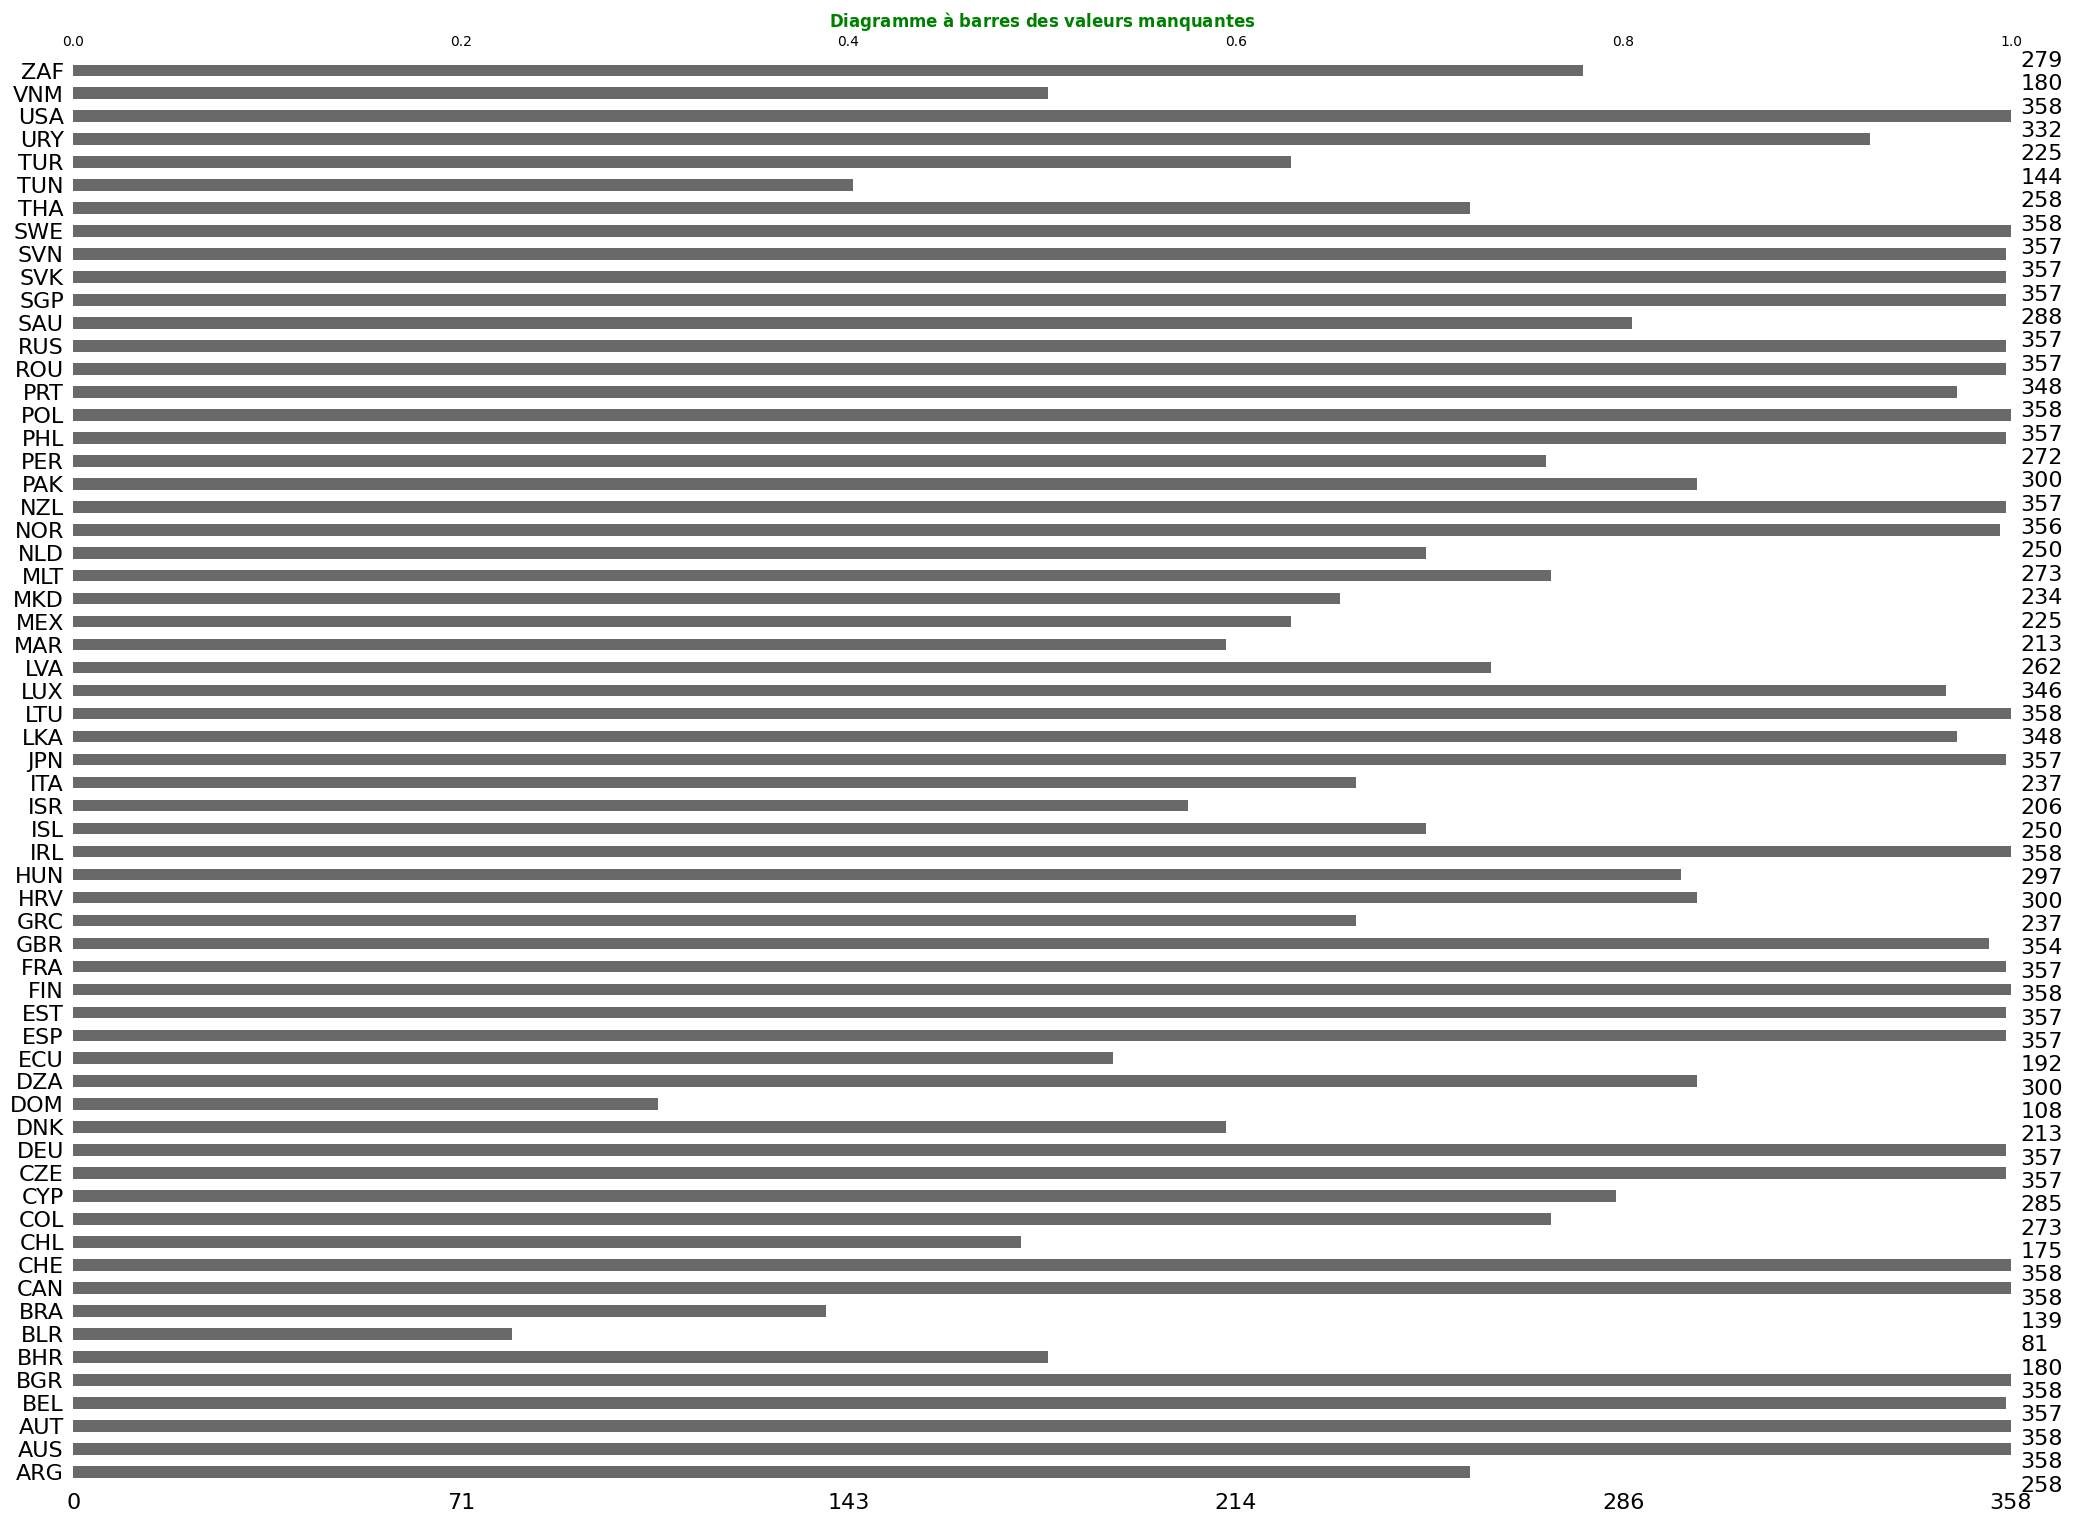

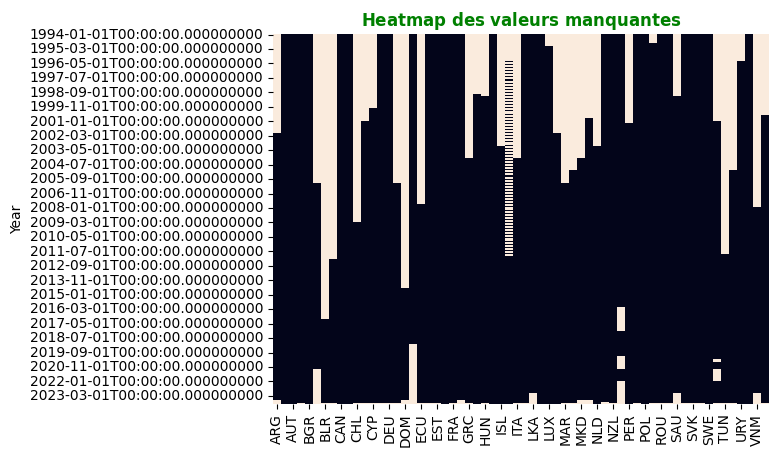

In [11]:
# Plot des valeurs manquantes
d.missing_plot(df_Unemployement)

Les données consistent en des séries temporelles. Chaque pays disposant de sa propre série temporelle du taux de chômage.<br>
D'après la visualisation ci-dessus, on constate que pour la plupart des pays : 
<div style="margin-left: 20px;">
-Les valeurs manquantes sont en début de la période considérée.<br></div>

Ainsi, nous allons garder uniquement les pays avec au moins 90% d'observations non manquantes.</div>

In [12]:
# Suppression des pays avec plus de 10% de valeurs manquantes sur la période
df_Unemployement = d.missing(df_Unemployement)

Pourcentage de valeurs manquantes par variable
URY    7.262570
LUX    3.351955
PRT    2.793296
LKA    2.793296
GBR    1.117318
NOR    0.558659
FRA    0.279330
JPN    0.279330
EST    0.279330
ESP    0.279330
CZE    0.279330
NZL    0.279330
PHL    0.279330
DEU    0.279330
ROU    0.279330
RUS    0.279330
SGP    0.279330
SVK    0.279330
SVN    0.279330
BEL    0.279330
dtype: float64


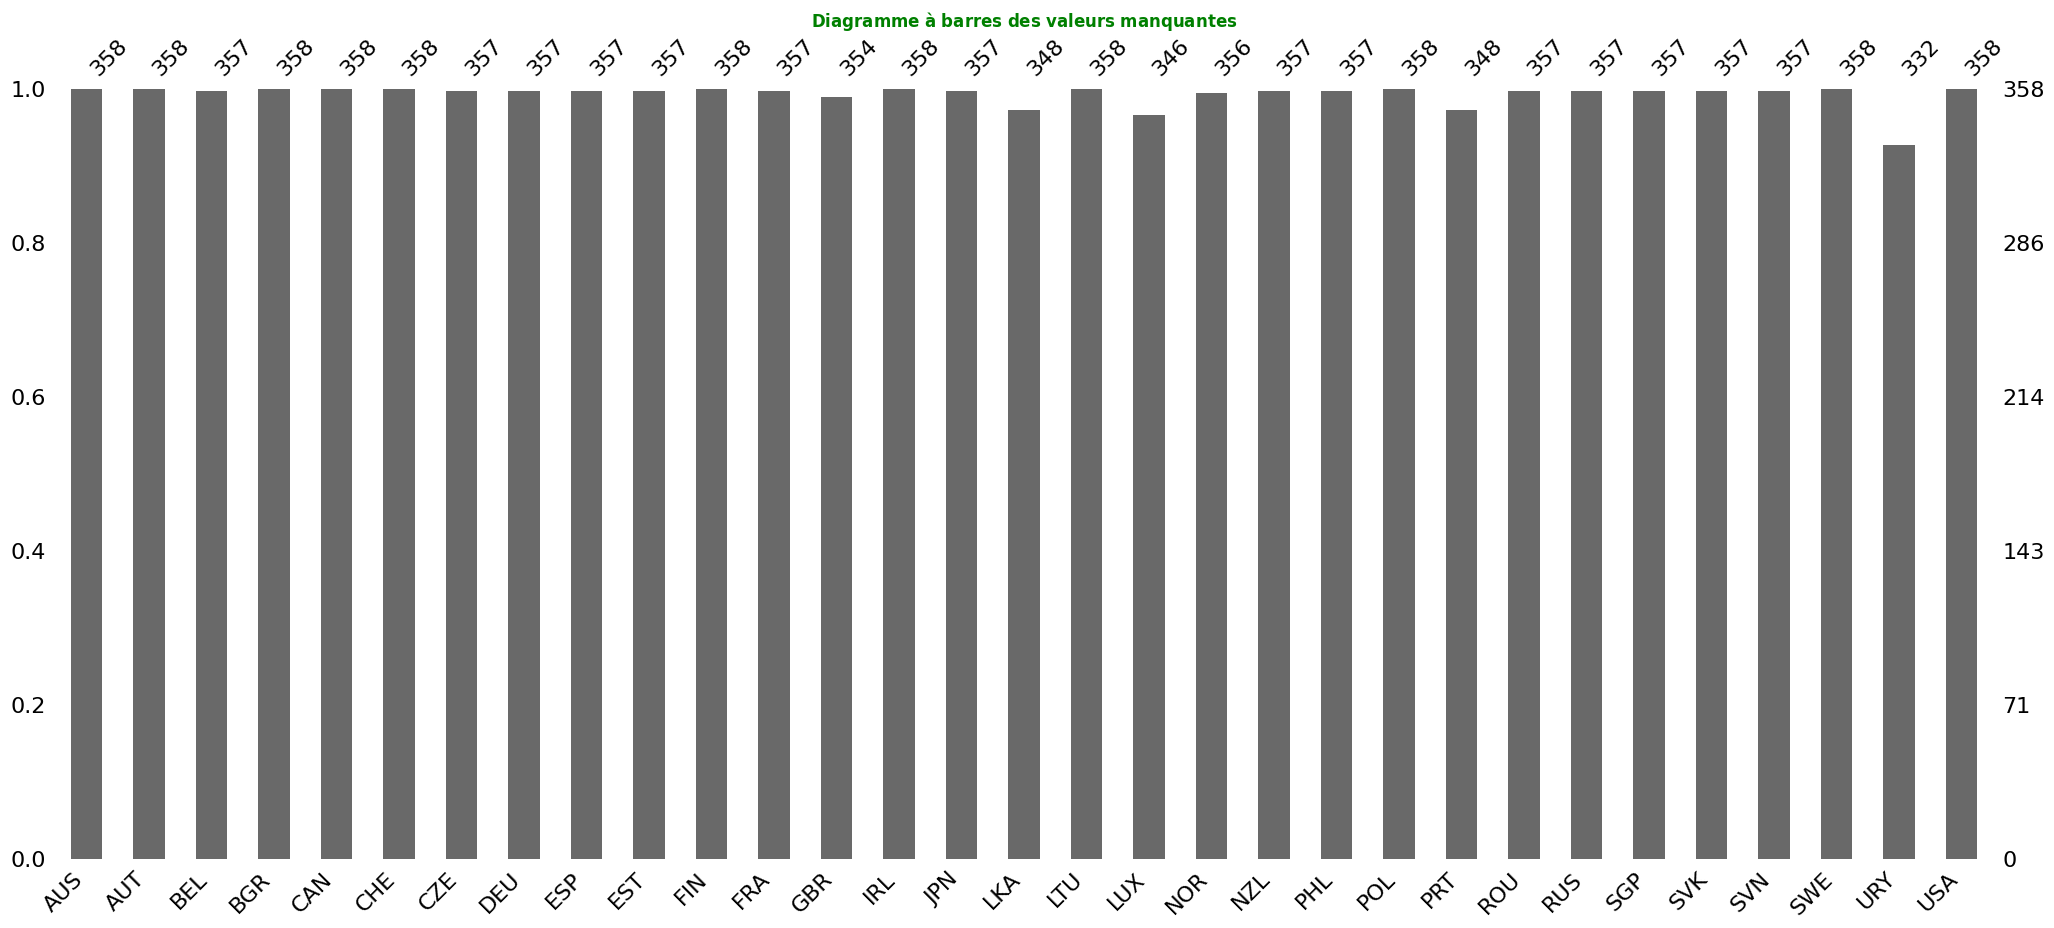

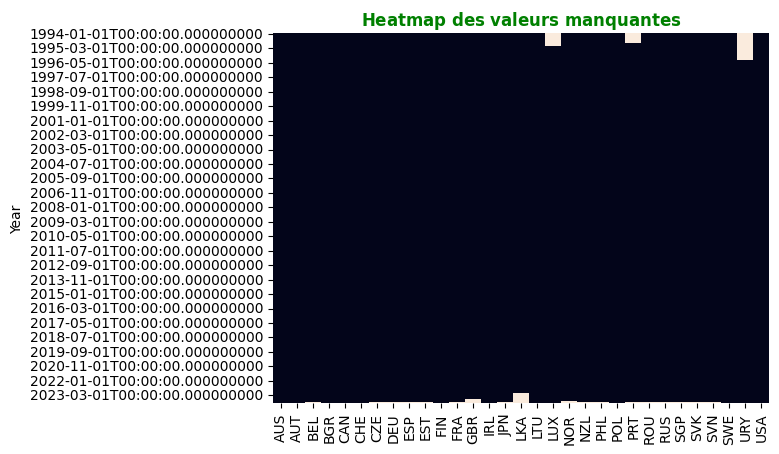

In [13]:
# Plot des valeurs manquantes
d.missing_plot(df_Unemployement)

In [14]:
# Taille de la DF 
print( "La DataFrame est de dimension", df_Unemployement.shape[0], "lignes et", df_Unemployement.shape[1], "colonnes.")

La DataFrame est de dimension 358 lignes et 31 colonnes.


À ce stade, on retrouve une DF où uniquement les pays avec suffisamment de données sont representés. 

##### Imputation des valeurs manquantes

L'imputation par la médiane étant plus robuste aux valeurs aberrantes sera privilégiée ici.

In [15]:
# Imputation des valeurs manquantes 
df_Unemployement = d.fill_missing_with_median(df_Unemployement)

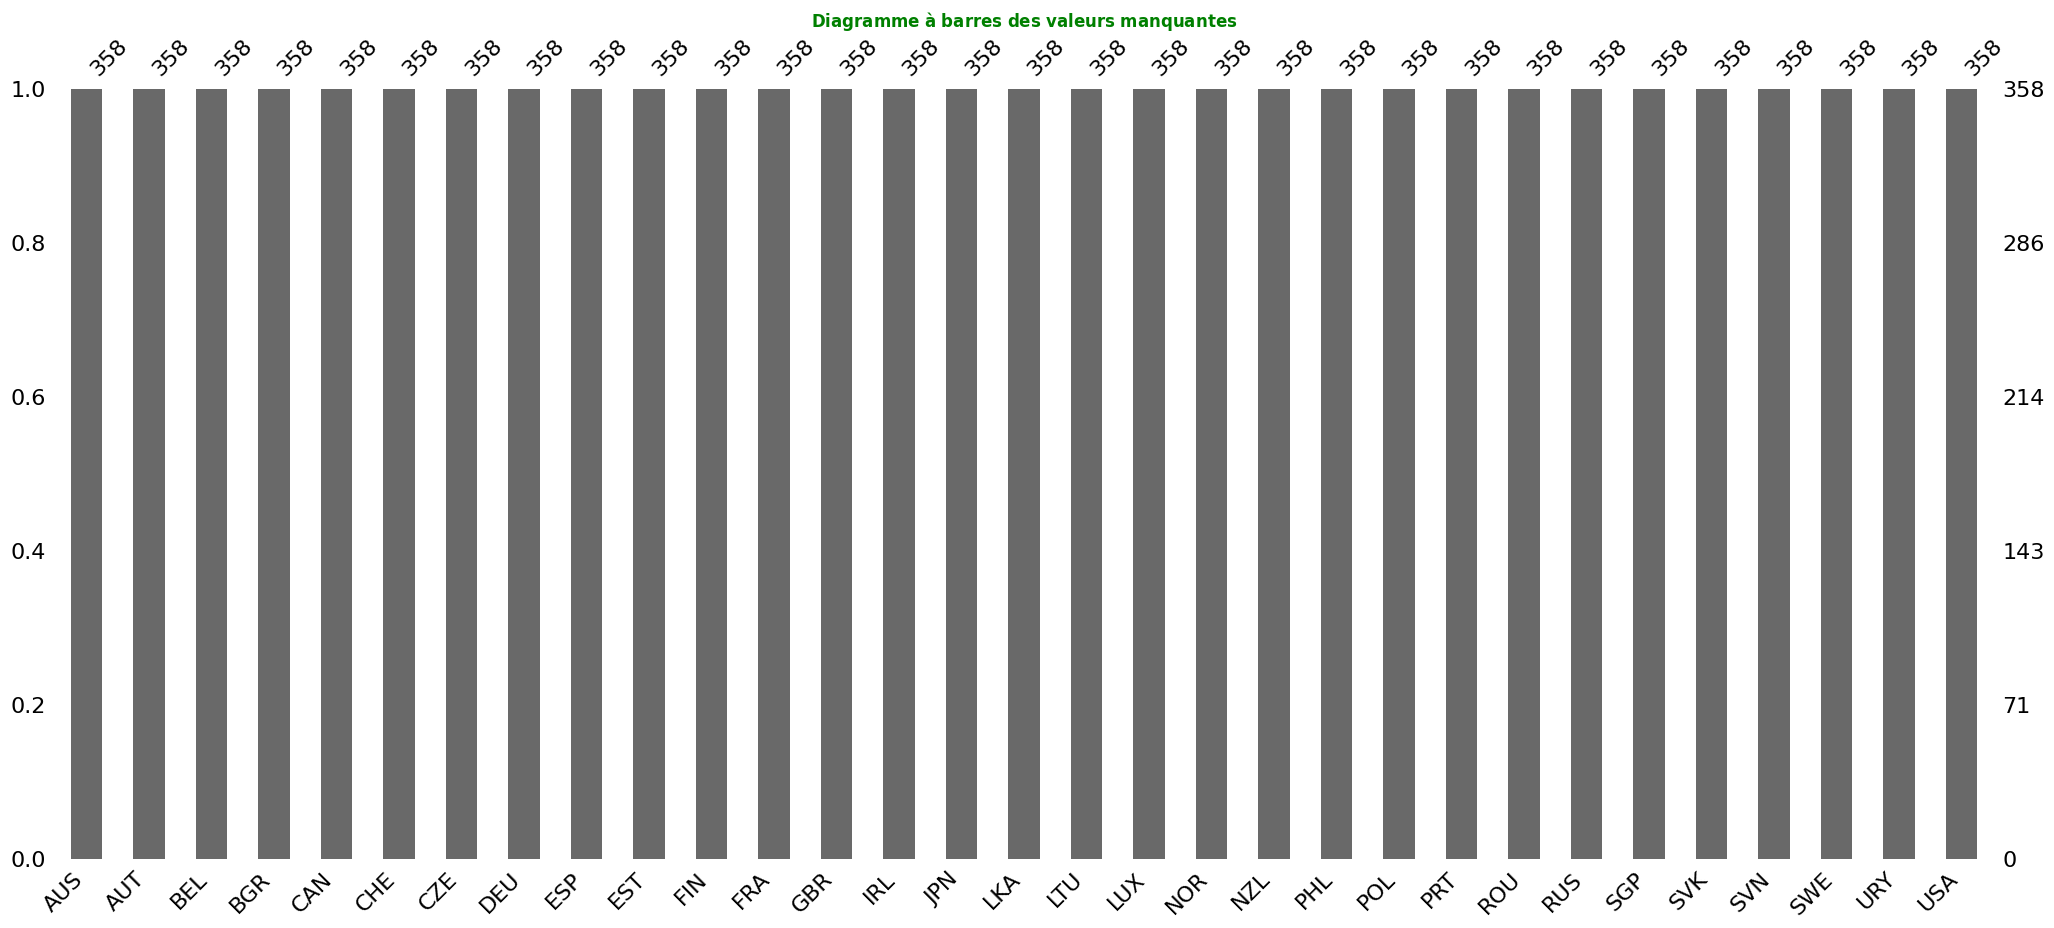

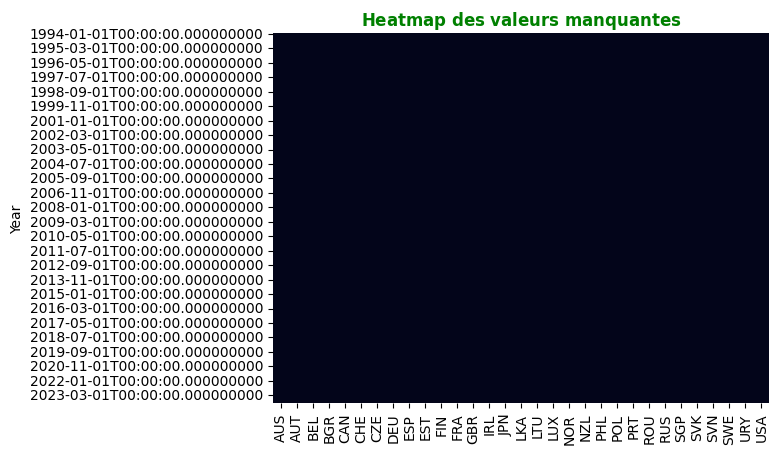

In [16]:
# Plot des valeurs manquantes
d.missing_plot(df_Unemployement)

Les valeurs manquantes sont totalement imputées. On obtient une DataFrame complète et propre prête à être utilisée pour l'analyse ou la modélisation. 

In [17]:
# Visualisation
df_Unemployement.head()

,AUS,AUT,BEL,BGR,CAN,CHE,CZE,DEU,ESP,EST,...,POL,PRT,ROU,RUS,SGP,SVK,SVN,SWE,URY,USA
Year,,,,,,,,,,,,,,,,,,,,,
1994-01-01,10.580050,6.672157,9.518617,15.86,11.4,4.847199,4.2,7.378757,22.2,7.5,...,16.4,7.987442,10.6,6.024640,1.7,14.49,15.1,11.26787,12.30,6.6
1994-02-01,10.369090,6.637267,9.631846,15.67,11.1,4.870878,4.2,7.472062,22.3,7.5,...,16.5,7.950988,10.8,6.327454,1.7,14.31,15.1,11.13366,12.20,6.6
1994-03-01,10.331460,6.425844,9.716527,15.49,10.6,4.837618,4.0,7.546336,22.2,7.5,...,16.6,7.914533,10.9,6.554162,1.7,14.45,15.0,10.84779,12.10,6.5
1994-04-01,10.106920,6.683679,9.837231,15.02,10.9,4.809402,4.4,7.544923,22.2,7.4,...,16.5,7.884960,11.0,6.841641,1.6,14.52,14.8,10.61952,11.95,6.4
1994-05-01,9.833122,6.609101,9.949417,14.73,10.7,4.808228,4.2,7.544081,22.2,7.4,...,16.6,7.855387,11.1,6.895477,1.6,14.62,14.7,10.62802,11.90,6.1


In [18]:
# Colonnes présentes dans Uemploy
pays = df_Unemployement.columns
print('Les pays de la DataFrame  df_Unemployement sont :',pays)

Les pays de la DataFrame  df_Unemployement sont : Index(['AUS', 'AUT', 'BEL', 'BGR', 'CAN', 'CHE', 'CZE', 'DEU', 'ESP', 'EST',
       'FIN', 'FRA', 'GBR', 'IRL', 'JPN', 'LKA', 'LTU', 'LUX', 'NOR', 'NZL',
       'PHL', 'POL', 'PRT', 'ROU', 'RUS', 'SGP', 'SVK', 'SVN', 'SWE', 'URY',
       'USA'],
      dtype='object')


**Précision :** <br>

À ce stade :
<div style="margin-left: 20px;">
-La DataFrame "df_Unemployement" est un tableau à 358 lignes et 31 colonnes. Nous disposons alors d'une série temporelle du taux de chômage de taille 358 observations pour chaque pays parmi les 31 pays.<br>
-L'index de la DF est de type date. Il s'agit en effet de données mensuelles s'étalant sur la période allant de Janvier 1994 à Janvier 2023.</div>

##### Transformation des données mensuelles en données trimestrielles

Plus loin, nous aurrons à réaliser une jointure entre la DataFrame comportant les taux de chomage et celle contenant les taux de croissance du PIB. Les données dont on dispose sur les taux de croissance du PIB sont trimestrielles. Il est alors plus cohérent de transformer les données mensuelles en données trimestrielles pour la DataFrame "df_Unemployement".

In [19]:
# Grouper par année de 12 mois chacun
df_Unemployement = df_Unemployement\
    .groupby(df_Unemployement.index.year)\
        .filter(lambda x: len(x) == 12)
df_Unemployement = d.pd.DataFrame(df_Unemployement)

L'idée du code précedent est de ne garder que les années pour lequelles les taux de chômage des 12 mois de l'année sont renseignés. L'année 2023, par exemple, sera éliminée car nous disposons que du taux de chomage du 1er mois de cette année.<br>

Le regroupement va se faire par une moyenne arithmétique simple.

In [20]:
# Transformation
df_Unemployement = df_Unemployement.resample('Q-JAN').mean()

# Ignorer les jours dans l'index
df_Unemployement.index =df_Unemployement.index.to_period('Q').strftime('%Y-Q%q')

# Appliquer le format trimestre au index
df_Unemployement.index = d.pd.to_datetime(df_Unemployement.index+ '-01', format='%Y-Q%m-%d')

# Formater l'index pour obtenir '1994-01' au lieu de '1994-01-01'
df_Unemployement.index = df_Unemployement.index.strftime('%Y-%m')

In [21]:
# Taille de la DF 
print( "La DataFrame est de dimension", df_Unemployement.shape[0], "lignes et", df_Unemployement.shape[1], "colonnes.")

La DataFrame est de dimension 117 lignes et 31 colonnes.


#### <span style="color:green; text-align:center;">II-1-1-2 Dataframe du taux de croissance du PIB</span>

In [22]:
# Visualisation
df_GDP.head(5)

,Albania,Argentina,Australia,Austria,Belgium,Bulgaria,Bahrain,Bosnia and Herzegovina,Belarus,Bolivia,...,Slovenia,Sweden,Thailand,Tunisia,Turkey,"Taiwan, China",Ukraine,Uruguay,United States,South Africa
Year,,,,,,,,,,,,,,,,,,,,,
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-01,NaN,0.635635,0.501645,NaN,NaN,NaN,NaN,NaN,NaN,1.467776,...,NaN,0.585296,0.767809,NaN,0.006777,0.972158,NaN,NaN,0.650468,0.224378
1994-02-01,NaN,0.644039,0.502208,NaN,NaN,NaN,NaN,NaN,NaN,1.489281,...,NaN,0.587775,0.778599,NaN,0.009421,0.971386,NaN,NaN,0.653595,0.225938
1994-03-01,NaN,0.629986,0.513144,NaN,NaN,NaN,NaN,NaN,NaN,1.553399,...,NaN,0.591138,0.791610,NaN,0.010014,0.975472,NaN,NaN,0.657365,0.227397
1994-04-01,NaN,0.633305,0.504920,NaN,NaN,NaN,NaN,NaN,NaN,1.613844,...,NaN,0.595983,0.809556,NaN,0.012484,0.979225,NaN,NaN,0.660922,0.234643


La 1ère ligne étant vierge. Cette dernière sera supprimée.

In [23]:
# Supprimez la ligne avec l'index NaN du DataFrame
df_GDP = df_GDP.drop(df_GDP.index[0])

# L'index de la DF
df_GDP.index

DatetimeIndex(['1994-01-01', '1994-02-01', '1994-03-01', '1994-04-01',
               '1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1996-01-01', '1996-02-01',
               ...
               '2021-03-01', '2021-04-01', '2022-01-01', '2022-02-01',
               '2022-03-01', '2022-04-01', '2023-01-01', '2023-02-01',
               '2023-03-01', '2023-04-01'],
              dtype='datetime64[ns]', name='Year', length=120, freq=None)

L'index de la DataFrame est de type date, les données sont trimestrielles et s'étalent sur la période allant du premier trimestre de 1994 au dernier trimestre de 2023.

In [24]:
# Informations sur la DF (nombre de valeurs non nulles, type de données de chaque colonne...)
df_GDP.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 1994-01-01 to 2023-04-01
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Albania                 62 non-null     float64
 1   Argentina               118 non-null    float64
 2   Australia               118 non-null    float64
 3   Austria                 114 non-null    float64
 4   Belgium                 114 non-null    float64
 5   Bulgaria                114 non-null    float64
 6   Bahrain                 62 non-null     float64
 7   Bosnia and Herzegovina  94 non-null     float64
 8   Belarus                 58 non-null     float64
 9   Bolivia                 118 non-null    float64
 10  Brazil                  118 non-null    float64
 11  Botswana                118 non-null    float64
 12  Canada                  118 non-null    float64
 13  Switzerland             118 non-null    float64
 14  Chile                  

Le type de données est conforme aux attentes.

In [25]:
# Taille de la DF 
print( "La DataFrame est de dimension", df_GDP.shape[0], "lignes et", df_GDP.shape[1], "colonnes.")

La DataFrame est de dimension 120 lignes et 85 colonnes.


In [26]:
# Formater l'index pour obtenir '1994-01' au lieu de '1994-01-01'
df_GDP.index = df_GDP.index.strftime('%Y-%m')

##### Correction des noms des pays

Comme pour la DF "df_unemployment", nous allons remplacer les noms des pays par leurs codes ISO.

In [27]:
# Appliquer la correction sur chaque colonne du DataFrame
df_GDP.columns = d.correct_country_name(df_GDP.columns)

# Base avec colonnes corrigées presente dans Unemploy
df_GDP=df_GDP[pays]

##### Détection des doublons

In [28]:
# Vérifier la présence de doublons
print("Nombre total de doublons dans df_GDP :", 
      df_GDP[df_GDP.duplicated()].shape[0])

Nombre total de doublons dans df_GDP : 0


In [29]:
# Supprimer les doublons (s'ils existent)
df_GDP.drop_duplicates(inplace=True)

print("Nombre total de doublons dans df_GDP :", 
      df_GDP[df_GDP.duplicated()].shape[0])

Nombre total de doublons dans df_GDP : 0


##### Détection des valeurs manquantes

Les valeurs manquantes sont visualisées via un diagramme à barre et un heatmap.

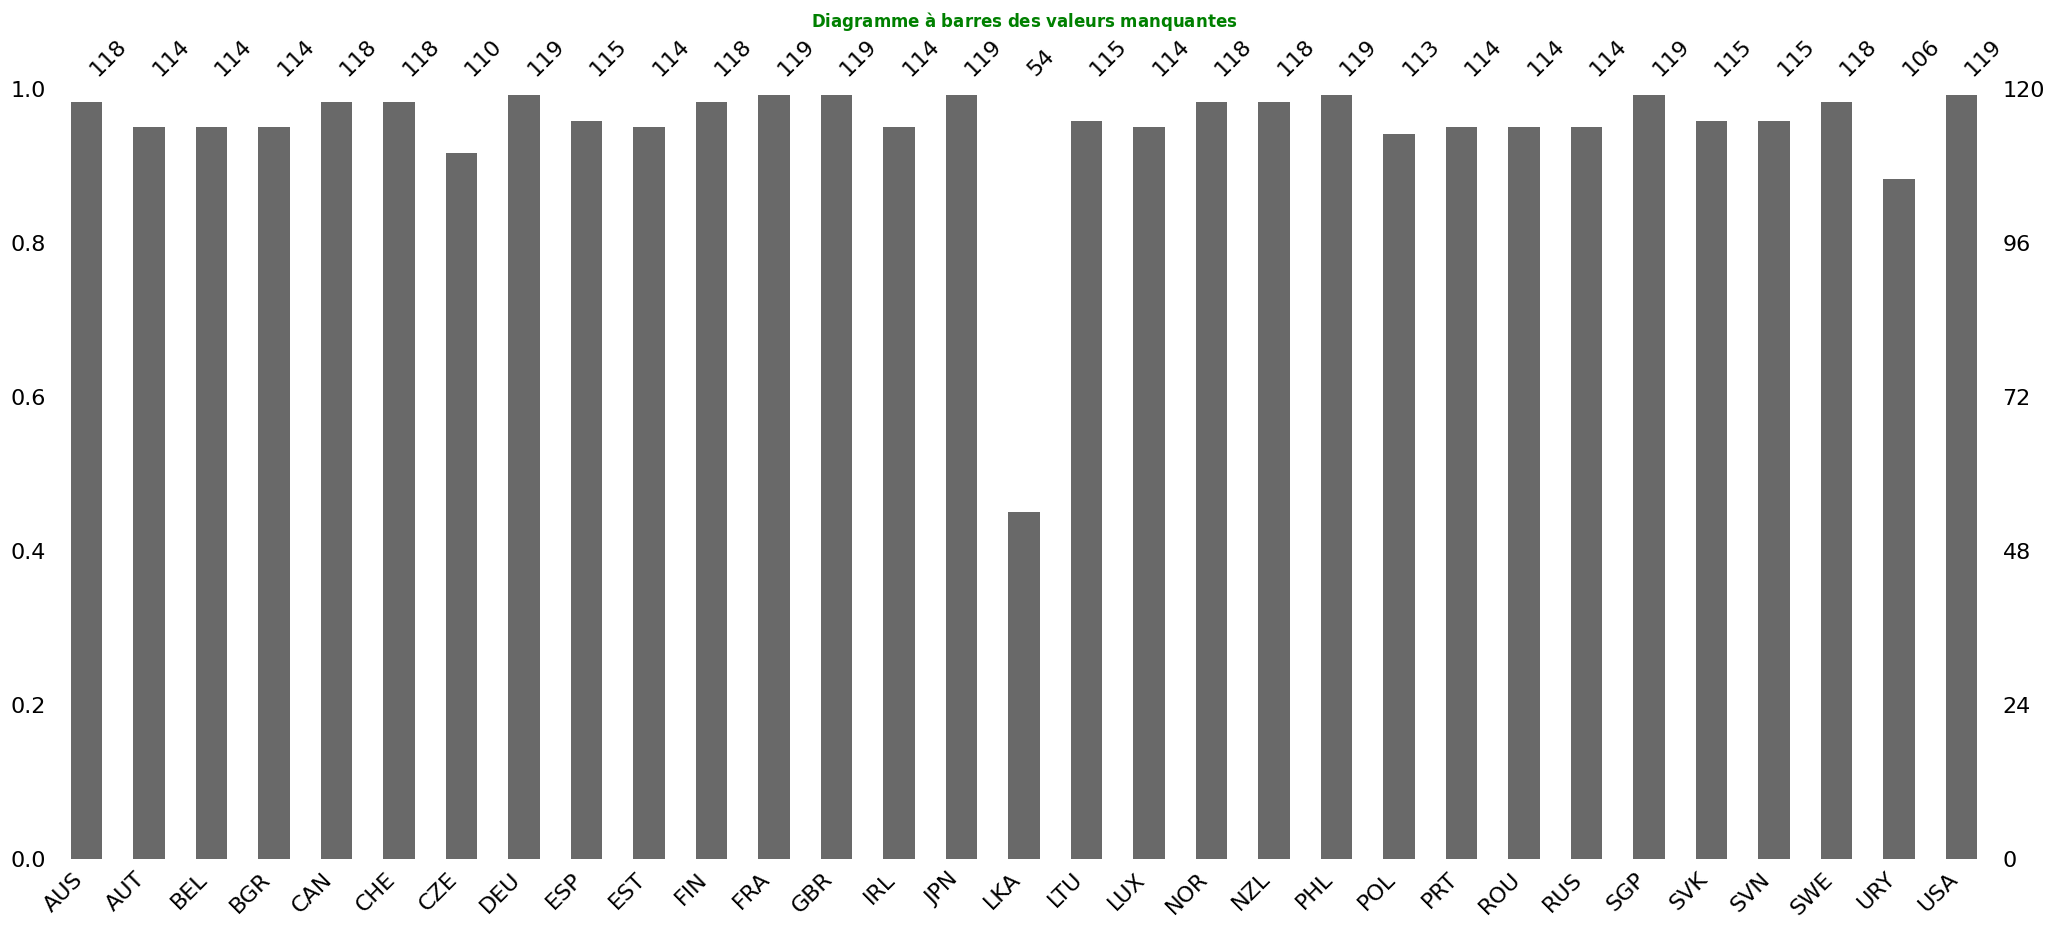

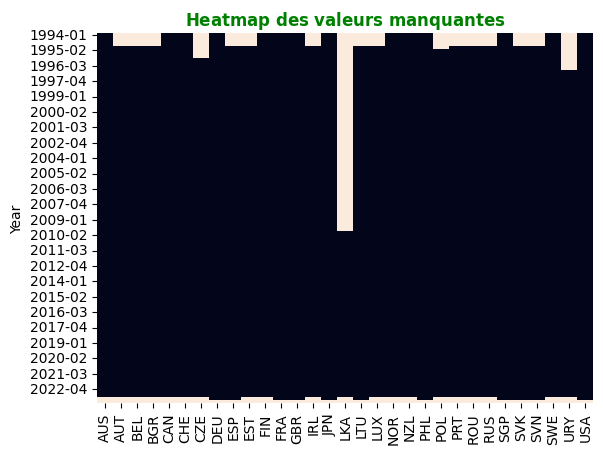

In [30]:
# Plot des valeurs manquantes
d.missing_plot(df_GDP)

Les données consistent en des séries temporelles. Chaque pays disposant de sa propre série temporelle du taux de croissance du PIB.<br>
D'après la visualisation ci-dessus, on constate que pour la plupart des pays : 
<div style="margin-left: 20px;">
-Les valeurs manquantes sont en début de la période considérée.<br></div>

Ainsi, nous allons garder uniquement les pays avec au moins 90% d'observations non manquantes.</div>

In [31]:
# Suppression des pays avec plus de 10% de valeurs manquantes sur la période
df_GDP = d.missing(df_GDP)

Pourcentage de valeurs manquantes par variable
CZE    8.333333
POL    5.833333
ROU    5.000000
IRL    5.000000
BEL    5.000000
BGR    5.000000
PRT    5.000000
LUX    5.000000
EST    5.000000
AUT    5.000000
RUS    5.000000
LTU    4.166667
SVN    4.166667
SVK    4.166667
ESP    4.166667
FIN    1.666667
SWE    1.666667
NOR    1.666667
NZL    1.666667
CHE    1.666667
CAN    1.666667
AUS    1.666667
SGP    0.833333
JPN    0.833333
PHL    0.833333
GBR    0.833333
FRA    0.833333
DEU    0.833333
USA    0.833333
dtype: float64


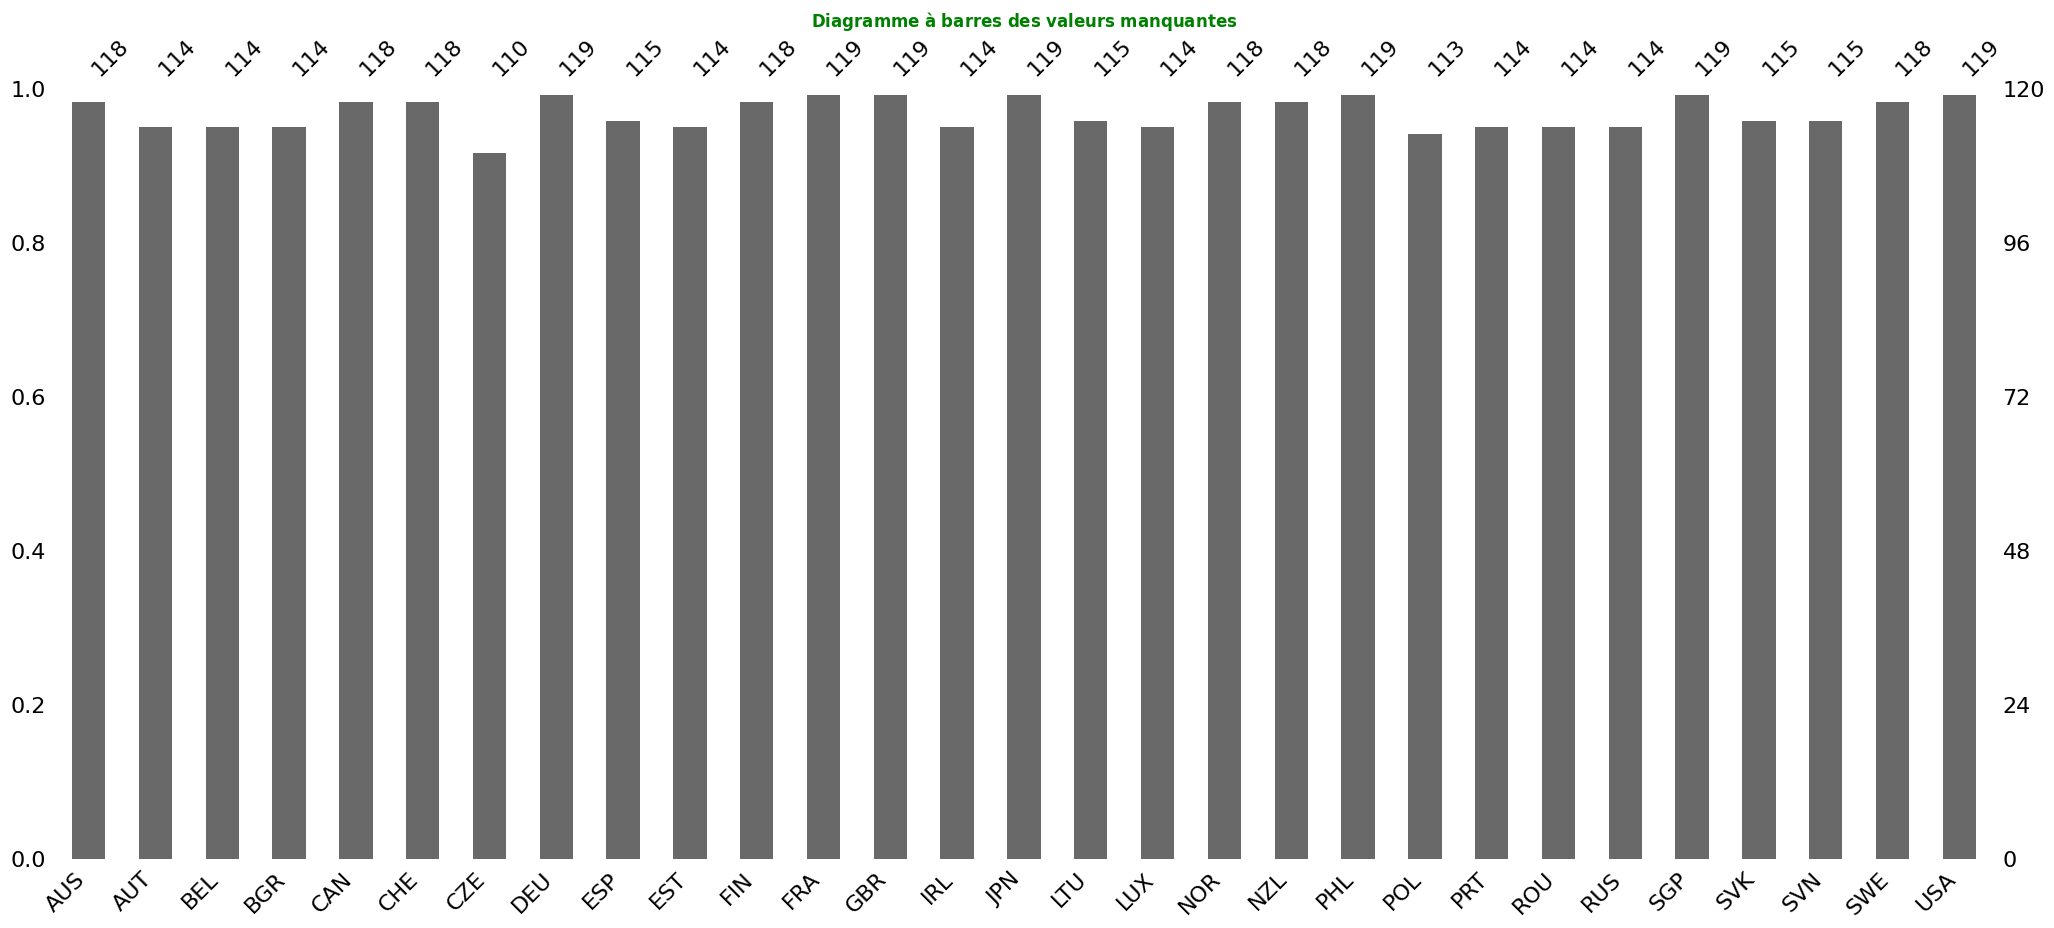

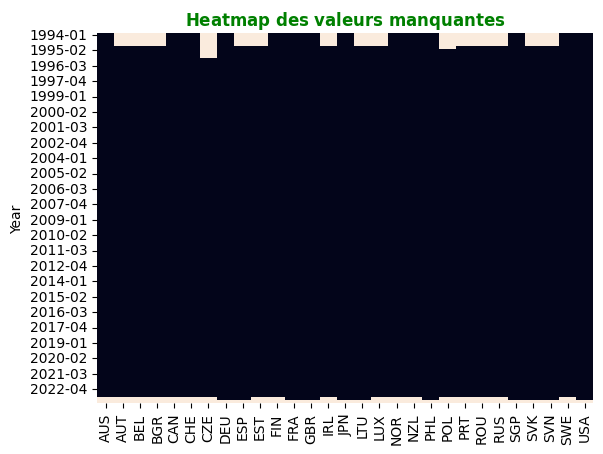

In [32]:
# Plot des valeurs manquantes
d.missing_plot(df_GDP)

##### Imputation des valeurs manquantes

On considère l'imputation par la médiane comme méthode d'imputation.

In [33]:
# Correction des valeurs manquantes 
df_GDP = d.fill_missing_with_median(df_GDP)

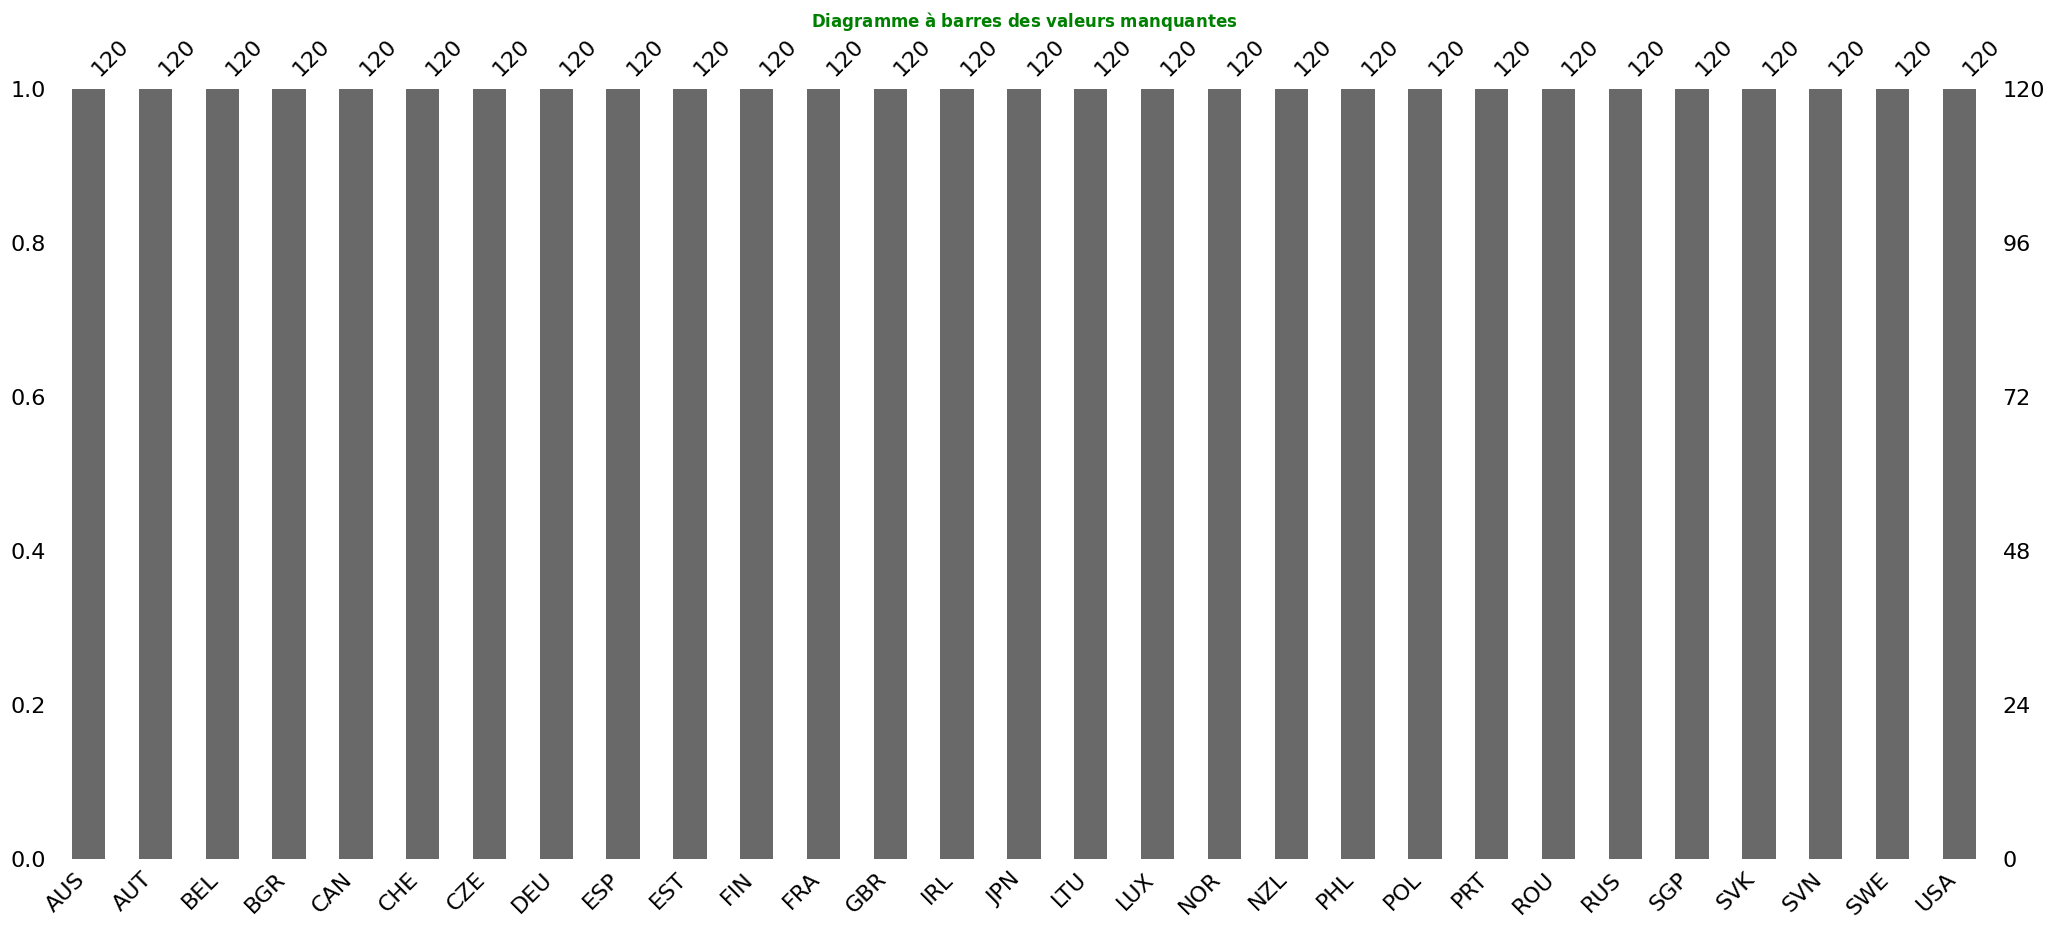

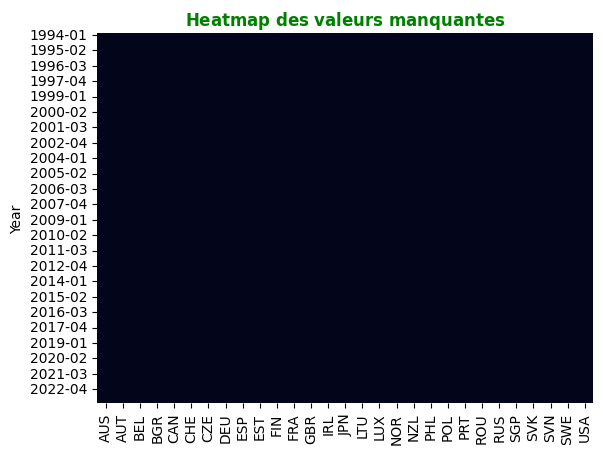

In [34]:
# Plot des valeurs manquantes
d.missing_plot(df_GDP)

Les valeurs manquantes sont totalement imputées. On obtient une DataFrame complète et propre prête à être utilisée pour l'analyse ou la modélisation. 

In [35]:
# Taille de la DF 
print( "La DataFrame est de dimension", df_GDP.shape[0], "lignes et", df_GDP.shape[1], "colonnes.")

La DataFrame est de dimension 120 lignes et 29 colonnes.


In [36]:
# Colonnes présentes dans gdp
pays1 = df_GDP.columns
print('Les pays de la DataFrame  df_Unemployement sont :',pays1)

Les pays de la DataFrame  df_Unemployement sont : Index(['AUS', 'AUT', 'BEL', 'BGR', 'CAN', 'CHE', 'CZE', 'DEU', 'ESP', 'EST',
       'FIN', 'FRA', 'GBR', 'IRL', 'JPN', 'LTU', 'LUX', 'NOR', 'NZL', 'PHL',
       'POL', 'PRT', 'ROU', 'RUS', 'SGP', 'SVK', 'SVN', 'SWE', 'USA'],
      dtype='object')


In [37]:
# Colonnes non présentes dans l'une des DF et pas dans l'autre
print(list(set(pays) - set(pays1))) 

['LKA', 'URY']


In [38]:
# Nombre de pays dans chaque DF
print("Le nombre de pays dans 'df_Unemployement' est de", len(pays), ".")
print("Le nombre de pays dans 'df_GDP' est de", len(pays1), ".")

Le nombre de pays dans 'df_Unemployement' est de 31 .
Le nombre de pays dans 'df_GDP' est de 29 .


Connaitre le nombre de pays dans chaque DF permet d'avoir une idée sur le nombre de pays qu'on aura au final après la jointure entre 'df_GDP' et 'df_Unemployement. 

**Précision :**

À ce stade :
<div style="margin-left: 20px;">
-La DataFrame "df_GDP" est un tableau à 120 lignes et 30 colonnes. Nous disposons alors d'une série temporelle du taux de croissance du PIB de 120 observations pour chaque pays parmi les 30 pays.<br>
-L'index de la DF est de type date. Il s'agit en effet de données trimestrielles s'étalant sur la période allant du premier trimestre de 1994  jusqu'au dernier trimestre de 2023.</div>

### <span style="color:green; text-align:center;">II-1-2 Fusion des deux bases</span>

In [39]:
reload(d)
# Tranformation des bases en format long 
dfs = d.transform(df_Unemployement, 'Unemployment_rate')
dfs1 = d.transform(df_GDP, 'GDP_rate')

In [40]:
# Visualisation
dfs1.head(10)

,YEAR,COUNTRY,GDP_rate
0,1994-01,AUS,0.501645
1,1994-01,CHE,0.907331
2,1994-01,SGP,0.806523
3,1994-01,IRL,0.763938
4,1994-01,LUX,0.634555
5,1994-01,ROU,1.405948
6,1994-01,DEU,0.794548
7,1994-01,USA,0.650468
8,1994-01,AUT,0.779464
9,1994-01,SVK,0.781847


In [41]:
# Fusion des bases
df_merge1 = d.pd.merge(dfs, dfs1, on=['YEAR', 'COUNTRY'], how='left') # La clé de jointure est composée des dates et des pays
df_merge1.head()

,YEAR,COUNTRY,Unemployment_rate,GDP_rate
0,1994-01,AUS,9.814137,0.501645
1,1994-01,SVN,14.650000,0.748256
2,1994-01,CAN,10.700000,0.680429
3,1994-01,AUT,6.609708,0.779464
4,1994-01,PHL,9.450000,0.329061


Suite à la jointure, on obtient une DF contenant en colonne les dates trimestrielles, les pays, les taux de chômage et les taux de croissance du PIB.

## <span style="color:green; text-align:center;">II-2 Importation de la base HNP_Stats_EXCEL.Zip via son url de téléchargement</span>

In [42]:
# L'importation se fait via l'url de téléchargement.
url = "https://databank.worldbank.org/data/download/HNP_Stats_EXCEL.zip"
d.load(url,"HNP_Stats_EXCEL.zip")

Téléchargement de base HNP_Stats_EXCEL.zip réussi.


In [43]:
# Choix des fichiers à extraire
nom_fichiers=[ ('HNP_StatsEXCEL.xlsx', 'Data')]

# Extraction des bases dans la mémoire: chomage et PIB déflaté
Big_data= [d.extraire_fichier_zip('./bases/HNP_Stats_EXCEL.zip', nom_fichier, nom_feuille)
                           for nom_fichier, nom_feuille in nom_fichiers]

L'extraction des données sur l'espérance de vie, et le taux de croissance de la population. <br>
Dans la prochaine étape, nous procéderons à une exploration rapide de ces données et les fusionnerons pour une analyse plus approfondie.


### <span style="color:green; text-align:center;">II-2-1 Préparation des bases avant fusion</span>

In [44]:
Big_data=Big_data[0]
# Visualisation
Big_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Africa Eastern and Southern,AFE,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,140.180526,140.810248,141.664168,142.324951,143.456933,144.33115,...,108.092796,107.697715,105.501833,103.222825,100.963526,99.491703,99.085572,97.413585,96.181442,NaN
1,Africa Eastern and Southern,AFE,Adults (ages 15+) and children (0-14 years) li...,SH.HIV.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Africa Eastern and Southern,AFE,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Eastern and Southern,AFE,Adults (ages 15+) living with HIV,SH.DYN.AIDS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Africa Eastern and Southern,AFE,Adults (ages 15-49) newly infected with HIV,SH.HIV.INCD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# Informations sur la DF (nombre de valeurs non nulles, type de données de chaque colonne...)
Big_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125020 entries, 0 to 125019
Data columns (total 67 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    125020 non-null  object 
 1   Country Code    125020 non-null  object 
 2   Indicator Name  125020 non-null  object 
 3   Indicator Code  125020 non-null  object 
 4   1960            41825 non-null   float64
 5   1961            42373 non-null   float64
 6   1962            42462 non-null   float64
 7   1963            42504 non-null   float64
 8   1964            42563 non-null   float64
 9   1965            42713 non-null   float64
 10  1966            42657 non-null   float64
 11  1967            42702 non-null   float64
 12  1968            42769 non-null   float64
 13  1969            42859 non-null   float64
 14  1970            44270 non-null   float64
 15  1971            44991 non-null   float64
 16  1972            45053 non-null   float64
 17  1973      


Le type de chaque variable est approprié et correspond aux types attendus.

#### <span style="color:green; text-align:center;">II-2-1-1 Base de données espérance de vie</span>

In [46]:
# Extraction des données sur l'esperance de vie 
df_LE = d.extract2(Big_data, 'expectancy', 'total')

In [47]:
# Visualisation
df_LE.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
152,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,44.085552,44.386697,44.752182,44.913159,45.479043,45.498338,...,60.709870,61.337917,61.856458,62.444050,62.922390,63.365863,63.755678,63.313860,62.454590,NaN
622,Africa Western and Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.845152,38.164950,38.735102,39.063715,39.335360,39.618038,...,55.673406,55.922229,56.195872,56.581678,56.888446,57.189139,57.555796,57.226373,56.988657,NaN


In [48]:
# Construction de la base "life expentancy"
reload(d)
df_LE=d.treat_info(df_LE, pays1)

Nombre total de doublons dans la base est: 0


In [49]:
# Visualisation
df_LE.head(2)

Country Code,AUS,AUT,BEL,BGR,CAN,CHE,CZE,DEU,ESP,EST,...,PHL,POL,PRT,ROU,RUS,SGP,SVK,SVN,SWE,USA
1994-01,77.878049,76.419512,76.691707,71.20878,77.871707,78.35,72.972683,76.270732,77.901463,66.5,...,67.942,71.695122,74.914634,69.509756,64.467073,76.197561,72.3,73.404878,78.650244,75.619512
1994-02,77.878049,76.419512,76.691707,71.20878,77.871707,78.35,72.972683,76.270732,77.901463,66.5,...,67.942,71.695122,74.914634,69.509756,64.467073,76.197561,72.3,73.404878,78.650244,75.619512


##### Détection des valeurs manquantes

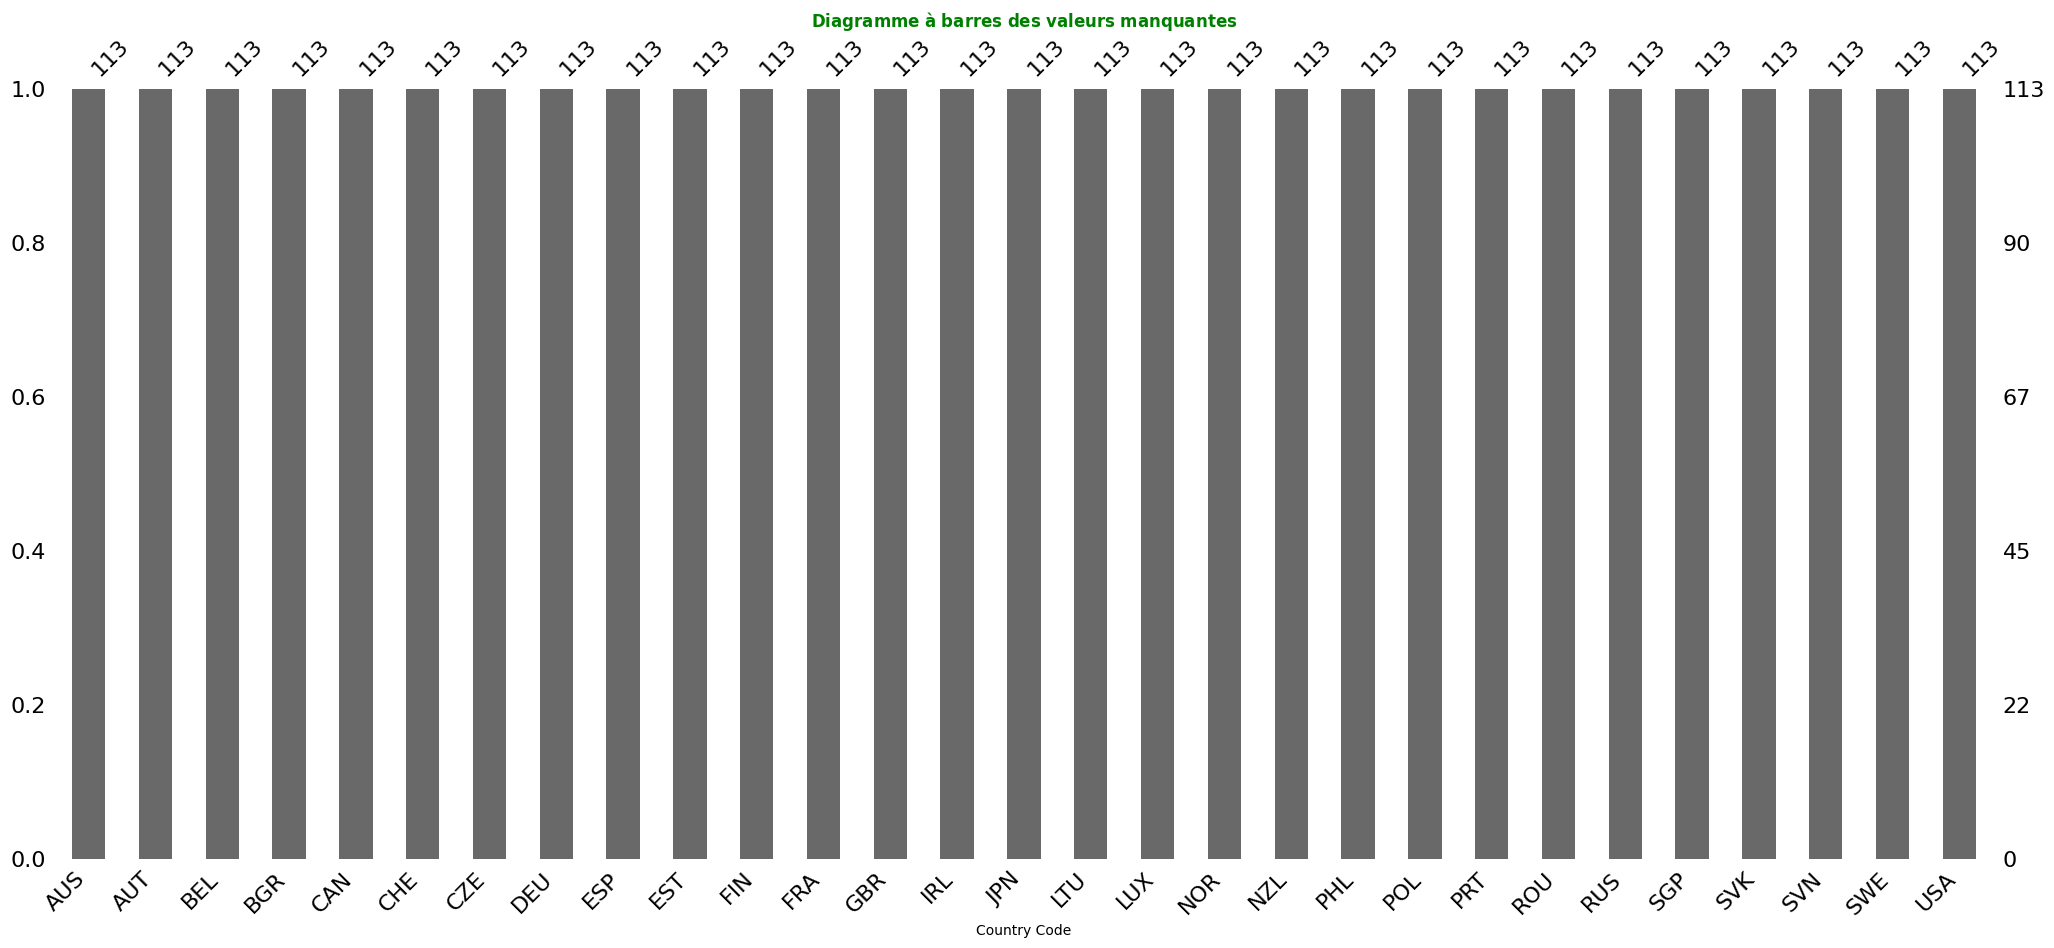

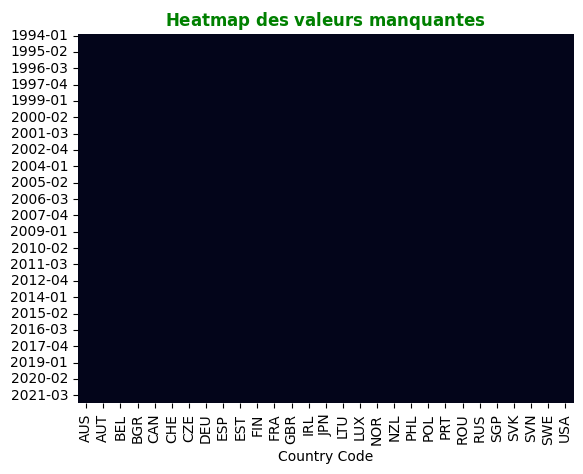

In [50]:
# Plot des Nan
d.missing_plot(df_LE)

La DF est complète, aucune valeur manquante n'est constatée.

#### <span style="color:green; text-align:center;">II-2-1-2 Base de données taux de croissance démographique</span>

In [51]:
# Extracton des données sur la croissance démographique 
reload(d)
df_pop=d.extract2(Big_data, '^Population growth \(annual %\)$','')

In [52]:
# Visualisation
df_pop.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
338,Africa Eastern and Southern,AFE,Population growth (annual %),SP.POP.GROW,NaN,2.660180,2.732633,2.753248,2.806915,2.840787,...,2.780207,2.774990,2.802586,2.728159,2.655672,2.688371,2.691134,2.678184,2.607472,2.543757
808,Africa Western and Central,AFW,Population growth (annual %),SP.POP.GROW,NaN,2.115789,2.145723,2.190827,2.211360,2.242567,...,2.761839,2.750731,2.723317,2.713059,2.706266,2.669239,2.633982,2.615646,2.573377,2.539799


In [53]:
# Informations sur la DF (nombre de valeurs non nulles, type de données de chaque colonne...)
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266 entries, 338 to 124888
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            0 non-null      float64
 5   1961            260 non-null    float64
 6   1962            260 non-null    float64
 7   1963            260 non-null    float64
 8   1964            260 non-null    float64
 9   1965            260 non-null    float64
 10  1966            260 non-null    float64
 11  1967            260 non-null    float64
 12  1968            260 non-null    float64
 13  1969            260 non-null    float64
 14  1970            260 non-null    float64
 15  1971            260 non-null    float64
 16  1972            260 non-null    float64
 17  1973            260 non-null    flo

In [54]:
# Construction de la base du taux de croissance démographique
reload(d)
df_pop=d.treat_info(df_pop, pays1)

Nombre total de doublons dans la base est: 0


In [55]:
# Visualisation
df_pop.tail()

Country Code,AUS,AUT,BEL,BGR,CAN,CHE,CZE,DEU,ESP,EST,...,PHL,POL,PRT,ROU,RUS,SGP,SVK,SVN,SWE,USA
2021-01,0.140895,0.435672,0.411602,-0.814846,0.575422,0.765501,-1.811871,0.042327,0.105799,0.105997,...,1.494557,-0.401729,0.626850,-0.746036,0.039793,-4.170336,-0.212359,0.268852,0.600592,0.156747
2021-02,0.140895,0.435672,0.411602,-0.814846,0.575422,0.765501,-1.811871,0.042327,0.105799,0.105997,...,1.494557,-0.401729,0.626850,-0.746036,0.039793,-4.170336,-0.212359,0.268852,0.600592,0.156747
2021-03,0.140895,0.435672,0.411602,-0.814846,0.575422,0.765501,-1.811871,0.042327,0.105799,0.105997,...,1.494557,-0.401729,0.626850,-0.746036,0.039793,-4.170336,-0.212359,0.268852,0.600592,0.156747
2021-04,0.140895,0.435672,0.411602,-0.814846,0.575422,0.765501,-1.811871,0.042327,0.105799,0.105997,...,1.494557,-0.401729,0.626850,-0.746036,0.039793,-4.170336,-0.212359,0.268852,0.600592,0.156747
2022-01,1.238639,0.956288,0.856132,-6.187253,1.823370,0.814796,1.570973,0.720875,0.761702,1.336552,...,1.463316,-2.482061,0.460949,-0.393251,0.073830,3.308621,-0.284861,0.185163,0.680583,0.377565


##### Détection des valeurs manquantes

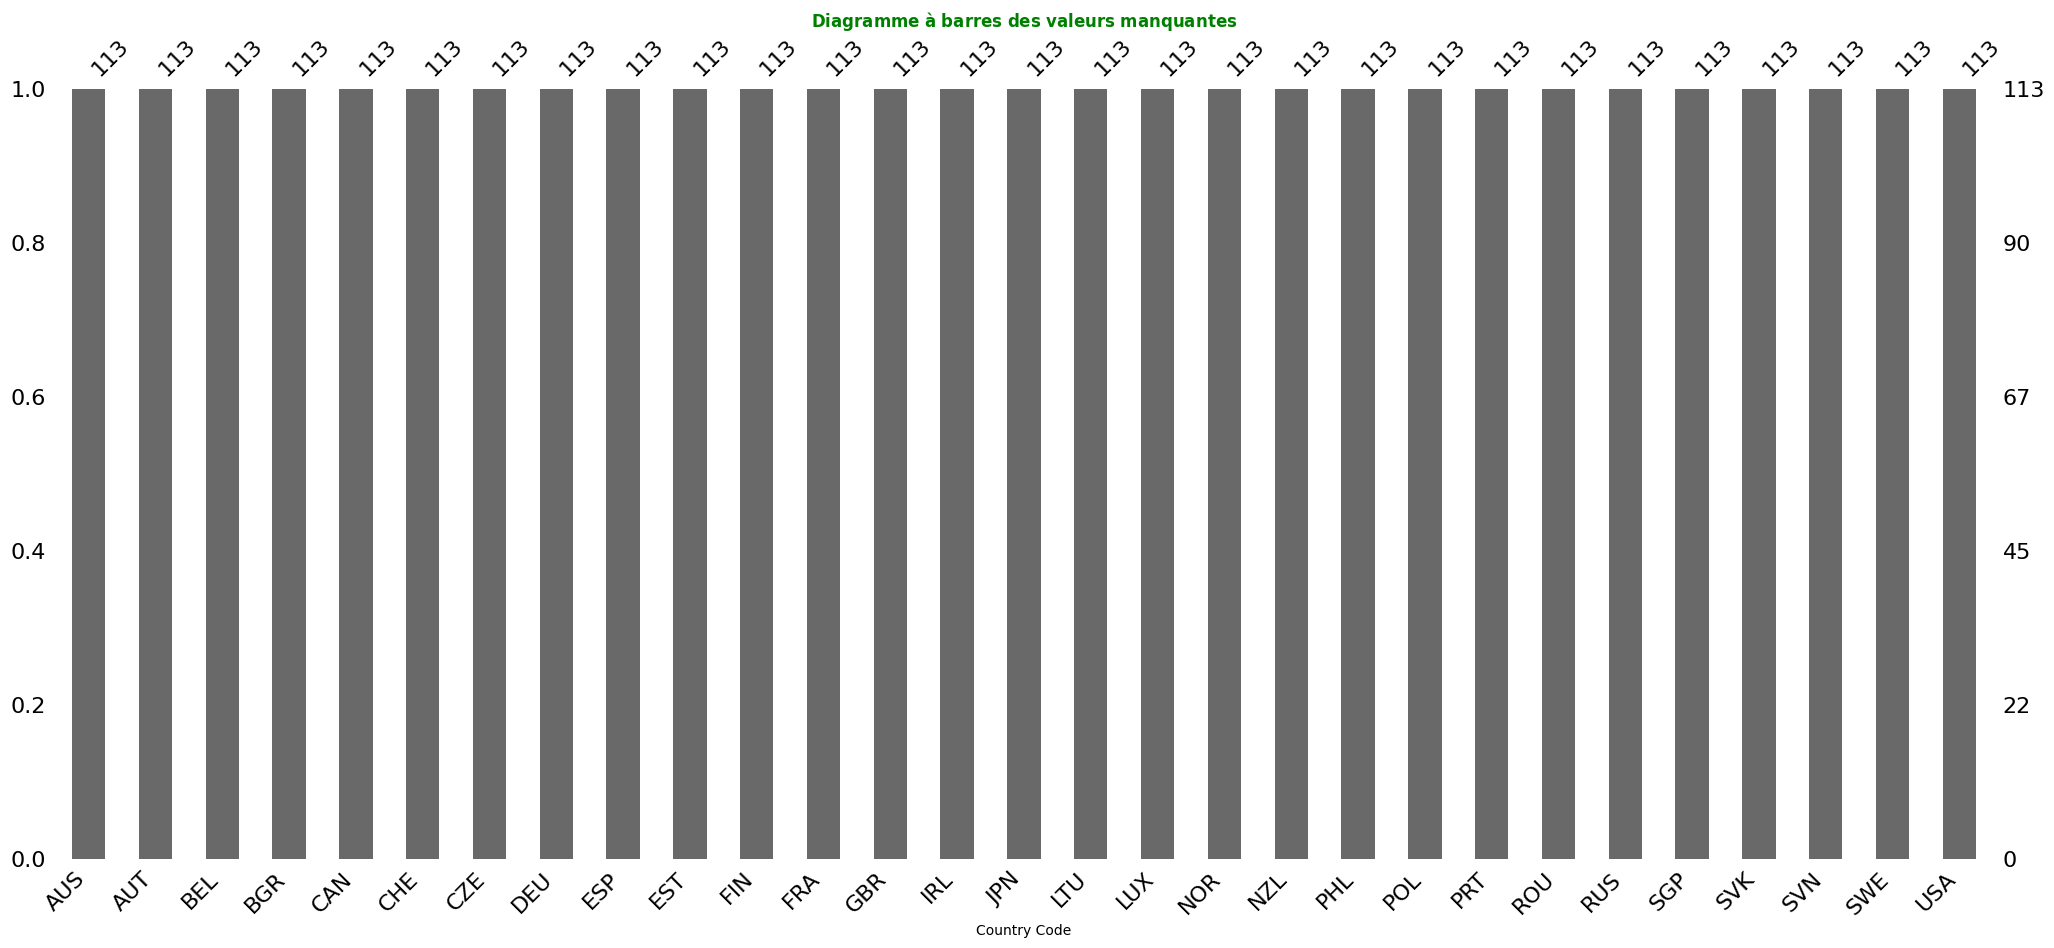

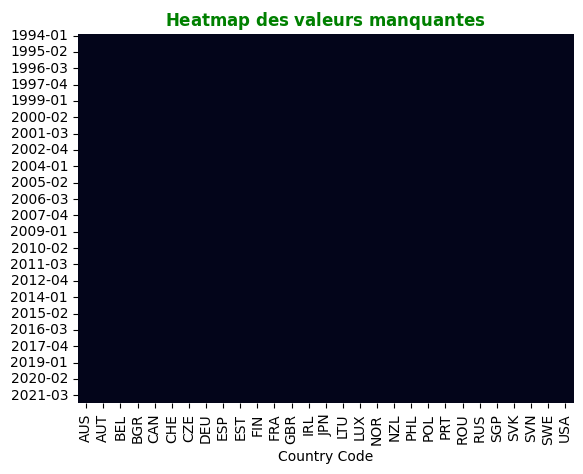

In [56]:
# Plot
d.missing_plot(df_pop)

La DF est complète, aucune valeur manquante n'est constatée.

### <span style="color:green; text-align:center;">II-2-2 Fusion des deux bases</span>

In [57]:
reload(d)
# Tranformation des bases en format long 
dfs = d.transform(df_LE, 'life_expentancy')
dfs1 = d.transform(df_pop, 'pop_growth_rate')

In [58]:
# Visualisation
dfs.head()

,YEAR,COUNTRY,life_expentancy
0,1994-01,AUS,77.878049
1,1994-01,LUX,76.370732
2,1994-01,CAN,77.871707
3,1994-01,SVK,72.300000
4,1994-01,FIN,76.395610


In [59]:
# Fusion des bases
df_merge2 = d.pd.merge(dfs, dfs1, on=['YEAR', 'COUNTRY'], how='left')
df_merge2.head()

,YEAR,COUNTRY,life_expentancy,pop_growth_rate
0,1994-01,AUS,77.878049,0.963092
1,1994-01,LUX,76.370732,1.361840
2,1994-01,CAN,77.871707,1.095258
3,1994-01,SVK,72.300000,0.394054
4,1994-01,FIN,76.395610,0.431049


In [60]:
# Fusion merge1 et merge2.
df_merge3 = d.pd.merge(df_merge1, df_merge2, on=['YEAR', 'COUNTRY'], how='left')
df_merge3.head()

,YEAR,COUNTRY,Unemployment_rate,GDP_rate,life_expentancy,pop_growth_rate
0,1994-01,AUS,9.814137,0.501645,77.878049,0.963092
1,1994-01,SVN,14.650000,0.748256,73.404878,-0.115694
2,1994-01,CAN,10.700000,0.680429,77.871707,1.095258
3,1994-01,AUT,6.609708,0.779464,76.419512,0.384870
4,1994-01,PHL,9.450000,0.329061,67.942000,2.343515


### <span style="color:green; text-align:center;">III- Base de données final : final_data </span>

La DataFrame **df_merge3** sera exporté sous forme de fichier CSV à l'emplacement spécifié sans inclure la colonne d'index. Celle ci étant la base de données à retenir pour la suite du projet.

In [61]:
# Exporter le DataFrame au format CSV
df_merge3.to_csv('./bases/final_data.csv', index=False)